In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import linalg, lil_matrix, eye

In [87]:
h = 0.02
x_l, x_r = -1, 1
y_l, y_r = -1, 1
k1 = 10
k2 = 10
lx, ly = np.abs(x_r - x_l), np.abs(y_r - y_l)
Nx, Ny = int(np.round(lx / h)), int(np.round(ly / h))
hx, hy = lx / Nx, ly / Ny
q = 10
a = 1
omega = np.pi / 8
nu = 0.5
beta = 0.9

x = np.linspace(x_l + hx / 2, x_r - hx / 2, Nx)
y = np.linspace(y_l + hy / 2, y_r - hy / 2, Ny)
t, tau = np.linspace(0, 5, 120, retstep=True)

X, Y = np.meshgrid(x, y, indexing="ij")

In [ ]:
def nozzle_x(a, omega, t):
    return a * np.cos(omega * t) / (1 + np.sin(omega * t) ** 2)

def nozzle_y(a, omega, t):
    return a * np.sin(omega * t) * np.cos(omega * t) / (1 + np.sin(omega * t))

def f(x, y, q, a, omega, t):
    sigma = 0.01
    return q * (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - nozzle_x(a, omega, t))**2 + (y - nozzle_y(a, omega, t))**2) / (2 * sigma**2))

In [89]:
def RHS(X, Y, q, a, omega, t):
    res = f(X, Y, q, a, omega, t)
    return res

def getL(Nx, Ny, hx, hy, beta):
    k = np.arange(Nx * Ny, dtype=int).reshape((Nx, Ny))
    L = lil_matrix((Nx * Ny, Nx * Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            L[k[i, j], k[i, j]] += 4 + beta
            
            if i == 0:
                L[k[i, j], k[i, j]] += 1 / (hx ** 2)
                L[k[i, j], k[i + 1, j]] -= 1 / (hx ** 2)
            elif i == Nx - 1:
                L[k[i, j], k[i, j]] += 1 / (hx ** 2)
                L[k[i, j], k[i - 1, j]] -= 1 / (hx ** 2)
            else:
                L[k[i, j], k[i - 1, j]] -= 1 / (hx ** 2)
                L[k[i, j], k[i + 1, j]] -= 1 / (hx ** 2)
                L[k[i, j], k[i, j]] += 2 / (hx ** 2)
            
            if j == 0:
                L[k[i, j], k[i, j]] += 1 / (hy ** 2)
                L[k[i, j], k[i, j + 1]] -= 1 / (hy ** 2)
            elif j == Ny - 1:
                L[k[i, j], k[i, j]] += 1 / (hy ** 2)
                L[k[i, j], k[i, j - 1]] -= 1 / (hy ** 2)
            else:
                L[k[i, j], k[i, j - 1]] -= 1 / (hy ** 2)
                L[k[i, j], k[i, j + 1]] -= 1 / (hy ** 2)
                L[k[i, j], k[i, j]] += 2 / (hy ** 2)
    
    return L.tocsr()

frame1 generated
frame2 generated
frame3 generated
frame4 generated
frame5 generated
frame6 generated
frame7 generated
frame8 generated
frame9 generated
frame10 generated
frame11 generated
frame12 generated
frame13 generated
frame14 generated
frame15 generated
frame16 generated
frame17 generated
frame18 generated
frame19 generated
frame20 generated
frame21 generated
frame22 generated
frame23 generated
frame24 generated
frame25 generated
frame26 generated
frame27 generated
frame28 generated
frame29 generated
frame30 generated
frame31 generated
frame32 generated
frame33 generated
frame34 generated
frame35 generated
frame36 generated
frame37 generated
frame38 generated
frame39 generated
frame40 generated
frame41 generated
frame42 generated
frame43 generated
frame44 generated
frame45 generated
frame46 generated
frame47 generated
frame48 generated
frame49 generated
frame50 generated
frame51 generated
frame52 generated
frame53 generated
frame54 generated
frame55 generated
frame56 generated
f

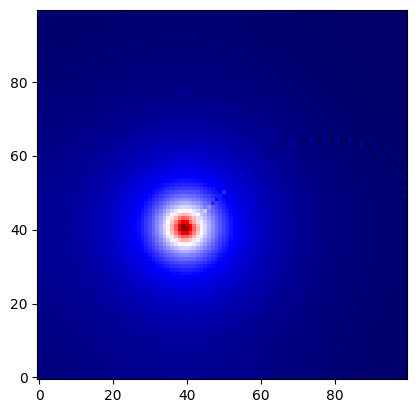

In [90]:
u_prev = np.zeros(Nx * Ny)
L = getL(Nx, Ny, hx, hy, beta)
F = RHS(X, Y, q, a, omega, t[0]).flatten()
A = eye(Nx * Ny, format='csr') + tau * nu * L
B = eye(Nx * Ny, format='csr') - tau * (1 - nu) * L
C = tau * F
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(u_prev.reshape(Nx, Ny).T, origin='lower', cmap='seismic')
plt.savefig('animation/frame0.png')
for i in range(1, len(t)):
    u_next = linalg.cg(A, B @ u_prev + C, x0=u_prev)[0]
    F = RHS(X, Y, q, a, omega, t[i]).flatten()
    C = tau * F
    u_prev = u_next
    ax.imshow(u_prev.reshape(Nx, Ny).T, origin='lower', cmap='seismic')
    plt.savefig('animation/frame' + str(i) + '.png')
    print(f'frame{i} generated')